In [1]:
# Notebook 7 - Looking at a flood day.
# 28th March 2024 was a flood day.  The river was bank full and in 
# the field at about 2:30pm* and continued to rise until past 5pm.  
# What does a graph of that day look like?

# * Note this was only when I observed it, not necessarily when it 
# reached our local field.

In [2]:
import pandas as pd     
import requests 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
df = pd.read_csv("data/readings-full-2024-03-28.csv") 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398954 entries, 0 to 398953
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   dateTime          398954 non-null  object
 1   date              398954 non-null  object
 2   measure           398954 non-null  object
 3   station           398954 non-null  object
 4   label             398954 non-null  object
 5   stationReference  398954 non-null  object
 6   parameter         398954 non-null  object
 7   qualifier         387450 non-null  object
 8   datumType         182972 non-null  object
 9   period            398954 non-null  int64 
 10  unitName          398954 non-null  object
 11  valueType         398954 non-null  object
 12  value             398948 non-null  object
dtypes: int64(1), object(12)
memory usage: 39.6+ MB


In [4]:
df.head(2)

,dateTime,date,measure,station,label,stationReference,parameter,qualifier,datumType,period,unitName,valueType,value
0,2024-03-28T00:00:00Z,2024-03-28,http://environment.data.gov.uk/flood-monitorin...,http://environment.data.gov.uk/flood-monitorin...,Loughborough,4205,level,Stage,http://environment.data.gov.uk/flood-monitorin...,900,mASD,instantaneous,0.132
1,2024-03-28T00:00:00Z,2024-03-28,http://environment.data.gov.uk/flood-monitorin...,http://environment.data.gov.uk/flood-monitorin...,AVON WEIR,531166,level,Downstream Stage,http://environment.data.gov.uk/flood-monitorin...,900,mAOD,instantaneous,50.443


In [5]:
# Sort out the datetime
df["dateTime"] = pd.to_datetime(df["dateTime"], 
                                format='%Y-%m-%dT%H:%M:%SZ')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398954 entries, 0 to 398953
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   dateTime          398954 non-null  datetime64[ns]
 1   date              398954 non-null  object        
 2   measure           398954 non-null  object        
 3   station           398954 non-null  object        
 4   label             398954 non-null  object        
 5   stationReference  398954 non-null  object        
 6   parameter         398954 non-null  object        
 7   qualifier         387450 non-null  object        
 8   datumType         182972 non-null  object        
 9   period            398954 non-null  int64         
 10  unitName          398954 non-null  object        
 11  valueType         398954 non-null  object        
 12  value             398948 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 39

In [6]:
# splitting out the different sites to different dataframes

mask_for_cowley = df["stationReference"] == "45117"
dfcowley = df[mask_for_cowley].copy()
dfcowley["value"] = dfcowley["value"].astype(float)

mask_for_upton = df["stationReference"] == "45136"
dfupton = df[mask_for_upton].copy()
dfupton["value"] = dfupton["value"].astype(float)

mask_for_yeoford = df["stationReference"] == "45137"
dfyeoford = df[mask_for_yeoford].copy()
dfyeoford["value"] = dfyeoford["value"].astype(float)

dfcowley.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 7755 to 396504
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dateTime          85 non-null     datetime64[ns]
 1   date              85 non-null     object        
 2   measure           85 non-null     object        
 3   station           85 non-null     object        
 4   label             85 non-null     object        
 5   stationReference  85 non-null     object        
 6   parameter         85 non-null     object        
 7   qualifier         85 non-null     object        
 8   datumType         0 non-null      object        
 9   period            85 non-null     int64         
 10  unitName          85 non-null     object        
 11  valueType         85 non-null     object        
 12  value             85 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 9.3+ KB


In [7]:
dfcowley.set_index("dateTime", inplace=True)
dfcowley.head(2)

,date,measure,station,label,stationReference,parameter,qualifier,datumType,period,unitName,valueType,value
dateTime,,,,,,,,,,,,
2024-03-28 00:30:00,2024-03-28,http://environment.data.gov.uk/flood-monitorin...,http://environment.data.gov.uk/flood-monitorin...,Cowley Bridge,45117,level,Stage,NaN,900,m,instantaneous,1.158
2024-03-28 00:00:00,2024-03-28,http://environment.data.gov.uk/flood-monitorin...,http://environment.data.gov.uk/flood-monitorin...,Cowley Bridge,45117,level,Stage,NaN,900,m,instantaneous,1.065


In [8]:
dfcowley.sort_index(inplace=True)

In [9]:
dfcowley.resample("15min")
dfcowley.head()

,date,measure,station,label,stationReference,parameter,qualifier,datumType,period,unitName,valueType,value
dateTime,,,,,,,,,,,,
2024-03-28 00:00:00,2024-03-28,http://environment.data.gov.uk/flood-monitorin...,http://environment.data.gov.uk/flood-monitorin...,Cowley Bridge,45117,level,Stage,NaN,900,m,instantaneous,1.065
2024-03-28 00:15:00,2024-03-28,http://environment.data.gov.uk/flood-monitorin...,http://environment.data.gov.uk/flood-monitorin...,Cowley Bridge,45117,level,Stage,NaN,900,m,instantaneous,1.108
2024-03-28 00:30:00,2024-03-28,http://environment.data.gov.uk/flood-monitorin...,http://environment.data.gov.uk/flood-monitorin...,Cowley Bridge,45117,level,Stage,NaN,900,m,instantaneous,1.158
2024-03-28 00:45:00,2024-03-28,http://environment.data.gov.uk/flood-monitorin...,http://environment.data.gov.uk/flood-monitorin...,Cowley Bridge,45117,level,Stage,NaN,900,m,instantaneous,1.217
2024-03-28 01:00:00,2024-03-28,http://environment.data.gov.uk/flood-monitorin...,http://environment.data.gov.uk/flood-monitorin...,Cowley Bridge,45117,level,Stage,NaN,900,m,instantaneous,1.284


In [10]:
dfcowley.rename(columns = {"value": "Cowley Bridge"}, 
                inplace = True)

In [11]:
# NEed to do the same steps for Upton and Yeoford
dfupton.set_index("dateTime", inplace=True)
dfupton.sort_index(inplace=True)
dfupton.resample("15min")
dfupton.rename(columns = {"value": "Upton Hellions"}, 
               inplace = True)

dfyeoford.set_index("dateTime", inplace=True)
dfyeoford.sort_index(inplace=True)
dfyeoford.resample("15min")
dfyeoford.rename(columns = {"value": "Yeoford"}, inplace = True)

C:\Users\suzan\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ret = self.converter.convert(x, self.units, self)
C:\Users\suzan\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ret = self.converter.convert(x, self.units, self)


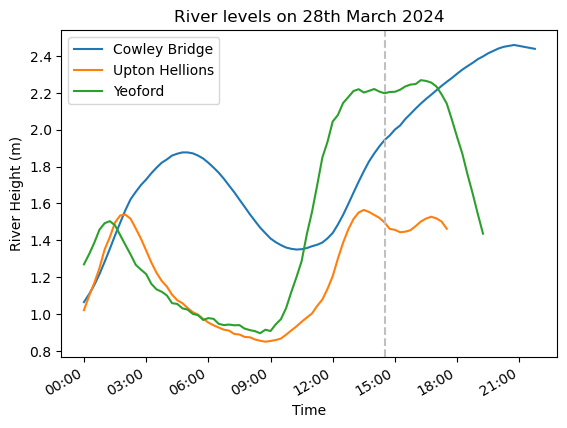

In [37]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))


dfcowley.plot(ax=ax, y="Cowley Bridge", use_index=True, 
              kind='line',
              title="River levels on 28th March 2024", 
              ylabel="River Height (m)");


dfupton.plot(ax=ax, y="Upton Hellions", use_index=True, 
             kind='line');


dfyeoford.plot(ax=ax, y="Yeoford", use_index=True, kind='line');

plt.axvline(x="28/03/2024 14:30", color="silver", linestyle="--")
ax.set_xlabel("Time");

In [13]:
# The grey line marks the point I passed the field and saw the 
# river had started to burst its banks.  Looking at the "bobbly" and 
# flattened nature of the rivers, I would guess that the river 
# started bursting its banks earlier than when I observed it.
# The field was significantly fuller a couple of hours later so 
# the volume of water was much larger than is captured by river 
# height.  I guess that is shown by the significantly wider peak 
# of Cowley Bridge, as the fields slowly drain again.


In [14]:
df2 = pd.read_csv("data/readings-full-2024-03-29.csv") 
df2["dateTime"] = pd.to_datetime(df2["dateTime"], 
                                format='%Y-%m-%dT%H:%M:%SZ')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398954 entries, 0 to 398953
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   dateTime          398954 non-null  datetime64[ns]
 1   date              398954 non-null  object        
 2   measure           398954 non-null  object        
 3   station           398954 non-null  object        
 4   label             398954 non-null  object        
 5   stationReference  398954 non-null  object        
 6   parameter         398954 non-null  object        
 7   qualifier         387450 non-null  object        
 8   datumType         182972 non-null  object        
 9   period            398954 non-null  int64         
 10  unitName          398954 non-null  object        
 11  valueType         398954 non-null  object        
 12  value             398948 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 39

In [15]:
# splitting out the different sites to different dataframes

mask_for_cowley = df2["stationReference"] == "45117"
dfcowley2 = df2[mask_for_cowley].copy()
dfcowley2["value"] = dfcowley2["value"].astype(float)

mask_for_upton = df2["stationReference"] == "45136"
dfupton2 = df2[mask_for_upton].copy()
dfupton2["value"] = dfupton2["value"].astype(float)

mask_for_yeoford = df2["stationReference"] == "45137"
dfyeoford2 = df2[mask_for_yeoford].copy()
dfyeoford2["value"] = dfyeoford2["value"].astype(float)

dfcowley2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 11639 to 372959
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dateTime          84 non-null     datetime64[ns]
 1   date              84 non-null     object        
 2   measure           84 non-null     object        
 3   station           84 non-null     object        
 4   label             84 non-null     object        
 5   stationReference  84 non-null     object        
 6   parameter         84 non-null     object        
 7   qualifier         84 non-null     object        
 8   datumType         0 non-null      object        
 9   period            84 non-null     int64         
 10  unitName          84 non-null     object        
 11  valueType         84 non-null     object        
 12  value             84 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 9.2+ KB


In [16]:
dfcowley2.set_index("dateTime", inplace=True)
dfcowley2.sort_index(inplace=True)
dfcowley2.resample("15min")
dfcowley2.rename(columns = {"value": "Cowley Bridge"}, 
                inplace = True)
dfcowley_both = pd.concat([dfcowley, dfcowley2], axis = 0)


#dfupton2.set_index("dateTime", inplace=True)
#dfupton2.sort_index(inplace=True)
#dfupton2.resample("15min")
#dfupton2.rename(columns = {"value": "Upton Hellions"}, 
#               inplace = True)
#dfupton_both = pd.concat([dfupton, dfupton2], axis = 0)

dfyeoford2.set_index("dateTime", inplace=True)
dfyeoford2.sort_index(inplace=True)
dfyeoford2.resample("15min")
dfyeoford2.rename(columns = {"value": "Yeoford"}, 
                  inplace = True)
dfyeoford_both = pd.concat([dfyeoford, dfyeoford2], axis = 0)

In [17]:
dfcowley2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2024-03-29 00:00:00 to 2024-03-29 20:45:00
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              84 non-null     object 
 1   measure           84 non-null     object 
 2   station           84 non-null     object 
 3   label             84 non-null     object 
 4   stationReference  84 non-null     object 
 5   parameter         84 non-null     object 
 6   qualifier         84 non-null     object 
 7   datumType         0 non-null      object 
 8   period            84 non-null     int64  
 9   unitName          84 non-null     object 
 10  valueType         84 non-null     object 
 11  Cowley Bridge     84 non-null     float64
dtypes: float64(1), int64(1), object(10)
memory usage: 8.5+ KB


In [18]:
dfupton2.info()
# The upton reporting must have failed, as no erports today

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dateTime          0 non-null      datetime64[ns]
 1   date              0 non-null      object        
 2   measure           0 non-null      object        
 3   station           0 non-null      object        
 4   label             0 non-null      object        
 5   stationReference  0 non-null      object        
 6   parameter         0 non-null      object        
 7   qualifier         0 non-null      object        
 8   datumType         0 non-null      object        
 9   period            0 non-null      int64         
 10  unitName          0 non-null      object        
 11  valueType         0 non-null      object        
 12  value             0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 0.0+ bytes


In [19]:
dfyeoford2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65 entries, 2024-03-29 00:00:00 to 2024-03-29 16:00:00
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              65 non-null     object 
 1   measure           65 non-null     object 
 2   station           65 non-null     object 
 3   label             65 non-null     object 
 4   stationReference  65 non-null     object 
 5   parameter         65 non-null     object 
 6   qualifier         65 non-null     object 
 7   datumType         0 non-null      object 
 8   period            65 non-null     int64  
 9   unitName          65 non-null     object 
 10  valueType         65 non-null     object 
 11  Yeoford           65 non-null     float64
dtypes: float64(1), int64(1), object(10)
memory usage: 6.6+ KB


C:\Users\suzan\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ret = self.converter.convert(x, self.units, self)
C:\Users\suzan\anaconda3\Lib\site-packages\matplotlib\axis.py:1732: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ret = self.converter.convert(x, self.units, self)


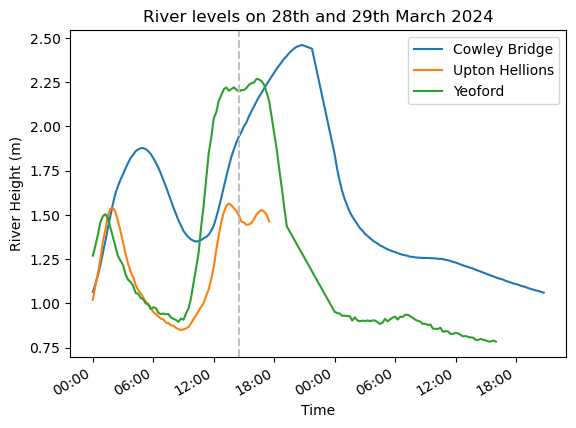

In [38]:
# Plotting both days

fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))


dfcowley_both.plot(ax=ax, y="Cowley Bridge", use_index=True, 
              kind='line', 
              title="River levels on 28th and 29th March 2024", 
              ylabel="River Height (m)");


dfupton.plot(ax=ax, y="Upton Hellions", use_index=True, 
             kind='line');


dfyeoford_both.plot(ax=ax, y="Yeoford", use_index=True, kind='line');

plt.axvline(x="28/03/2024 14:30", color="silver", linestyle="--")
ax.set_xlabel("Time");

In [22]:
# The peak of the Cowley Bridge site is significantly wider meaning
# it was full for longer.  While this is characteristic of a larger
# river it could also show the flooding draining into it as the 
# fields, that had been storing water drain.

In [35]:
# Out of interest, what time was the max?
print('\033[1m'+"Cowley Bridge:"+'\033[0m')
print(dfcowley_both["Cowley Bridge"][dfcowley_both["Cowley Bridge"] == dfcowley_both["Cowley Bridge"].max()])
print(" ")
print('\033[1m'+"Upton Hellions:"+'\033[0m')
print(dfupton["Upton Hellions"][dfupton["Upton Hellions"] == dfupton["Upton Hellions"].max()])
print(" ")
print('\033[1m'+"Yeoford:"+'\033[0m')
print(dfyeoford_both["Yeoford"][dfyeoford_both["Yeoford"] == dfyeoford_both["Yeoford"].max()])

Cowley Bridge:
dateTime
2024-03-28 20:45:00    2.46
Name: Cowley Bridge, dtype: float64
 
Upton Hellions:
dateTime
2024-03-28 13:30:00    1.565
Name: Upton Hellions, dtype: float64
 
Yeoford:
dateTime
2024-03-28 16:15:00    2.269
Name: Yeoford, dtype: float64


In [ ]:
# instantaineous peaks don't really mean much as the peak
# lasted a significant period, spread by the flooding.